<a href="https://colab.research.google.com/github/coderanandmaurya/SVM/blob/main/SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # for datanalysis
import numpy as np # mathematical or statisticial operation (array)

iris=pd.read_csv('https://raw.githubusercontent.com/coderanandmaurya/SVM/main/Iris.csv') # read csv file
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:

# split the dateset into dependent and independent features
X = iris.iloc[:,1:5]# petal length and width
y = iris.iloc[:,5]


#to check null values in the dataset
X.isnull().sum()


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [3]:
# to check the datatype of each column

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# to convert Species(object datatype) into Numeric (Labelencoder)
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
lb.fit(y)
y=lb.transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = .20, 
                                                     random_state = 0)

print(y_train.shape)
print(y_test.shape)
print(X_train.shape) # 120 records
X_test.shape  # 30 records


(120,)
(30,)
(120, 4)


(30, 4)

In [6]:
from sklearn.svm import SVC

svc=SVC() #Default hyperparameters   (hyperperameter=rbf)

# to give training to model
svc.fit(X_train,y_train)

#to test your model
y_pred=svc.predict(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [7]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [8]:
from sklearn import metrics
print('Accuracy Score: of svc default parameters')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score: of svc default parameters
1.0


In [9]:
svc=SVC(kernel='linear')

svc.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Accuracy Score: with default linear kernel')

print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score: with default linear kernel
1.0


In [10]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score: with default rbf kernel')
print(metrics.accuracy_score(y_test,y_pred))


Accuracy Score: with default rbf kernel
1.0


In [11]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:with default poly kernel')
print(metrics.accuracy_score(y_test,y_pred))   #Polynomial kernel is performing poorly

Accuracy Score:with default poly kernel
1.0


In [12]:
svc=SVC(kernel='poly', degree = 8)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:with poly kernel and degree ')
print(metrics.accuracy_score(y_test,y_pred))   

from sklearn.metrics import confusion_matrix  
print(confusion_matrix(y_test, y_pred))  

Accuracy Score:with poly kernel and degree 
0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [13]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', C=1.0, gamma = 0.10) # C="plenty"(ignore outlier)  # gamma =" 0.10 good deafult value "

svm.fit(X_train,y_train)

y_pred=svc.predict(X_test)

print('Accuracy Score:with rbf kernel and with C and gamma value')

print(metrics.accuracy_score(y_test,y_pred))   


Accuracy Score:with rbf kernel and with C and gamma value
0.9666666666666667


In [14]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='sigmoid')  
svclassifier.fit(X_train, y_train)  
y_pred=svc.predict(X_test)
print('Accuracy Score:with sigmoid kernel')
print(metrics.accuracy_score(y_test,y_pred))   
print("y_pred",y_pred)
print("y_test",y_test)

Accuracy Score:with sigmoid kernel
0.9666666666666667
y_pred [2 1 0 2 0 2 0 1 1 1 2 1 2 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [15]:
from sklearn.metrics import confusion_matrix  
print(confusion_matrix(y_test, y_pred)) 

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


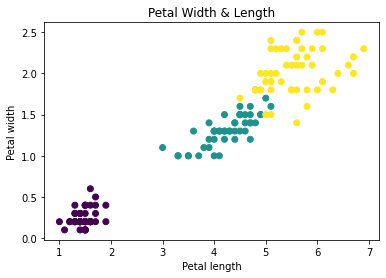

In [17]:
import matplotlib.pyplot as plt
def visuvalize_petal_data():
    iris=pd.read_csv('https://raw.githubusercontent.com/coderanandmaurya/SVM/main/Iris.csv')
    X = iris.iloc[:, 1:].values  # we only take the last two features.
    y = iris.iloc[:,5].values
    from sklearn.preprocessing import LabelEncoder
    y_labelencoder = LabelEncoder()
    y = y_labelencoder.fit_transform(y)
    plt.scatter(X[:, 2], X[:, 3],c=y)# c is color, every class should be in different color
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.title('Petal Width & Length')
    plt.show()

visuvalize_petal_data()